Logistic Regression
20.0% of data: Accuracy = 0.7648
40.0% of data: Accuracy = 0.8057
60.0% of data: Accuracy = 0.8466
80.0% of data: Accuracy = 0.8691
100.0% of data: Accuracy = 0.8937
Random Forest
20.0% of data: Accuracy = 0.6585
40.0% of data: Accuracy = 0.7403
60.0% of data: Accuracy = 0.7832
80.0% of data: Accuracy = 0.8221
100.0% of data: Accuracy = 0.8528
SVM
20.0% of data: Accuracy = 0.5746
40.0% of data: Accuracy = 0.6299
60.0% of data: Accuracy = 0.6973
80.0% of data: Accuracy = 0.7219
100.0% of data: Accuracy = 0.7587
KNN
20.0% of data: Accuracy = 0.5501
40.0% of data: Accuracy = 0.5603
60.0% of data: Accuracy = 0.5440
80.0% of data: Accuracy = 0.5337
100.0% of data: Accuracy = 0.5481
Decision Tree
20.0% of data: Accuracy = 0.5112
40.0% of data: Accuracy = 0.5051
60.0% of data: Accuracy = 0.6851
80.0% of data: Accuracy = 0.8037
100.0% of data: Accuracy = 0.7832


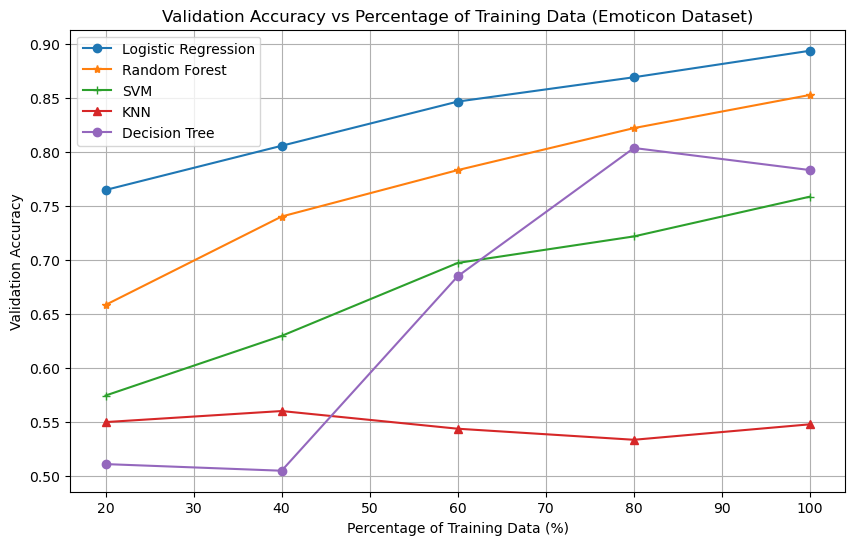

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


t_em_df = pd.read_csv("datasets/train/train_emoticon.csv")
v_em_df = pd.read_csv("datasets/valid/valid_emoticon.csv")


t_em_X = t_em_df['input_emoticon'].tolist()  
t_em_Y = t_em_df['label'].tolist()  

v_em_X = v_em_df['input_emoticon'].tolist()  
v_em_Y = v_em_df['label'].tolist()  

t_em_X_split = pd.DataFrame([list(i) for i in t_em_X])
v_em_X_split = pd.DataFrame([list(j) for j in v_em_X])


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


X_em_t = encoder.fit_transform(t_em_X_split)
X_em_v = encoder.transform(v_em_X_split)

def model_training(X_train, y_train, X_valid, y_valid, model, per):
    val_acc = []
    
    for p in per:
        subset_size = int(p * len(X_train))
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]
        
        model.fit(X_subset, y_subset)
        y_pred = model.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        val_acc.append(acc)
        
        print(f"{p*100}% of data: Accuracy = {acc:.4f}")
    
    return val_acc

model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(n_estimators=200)
model_svc = SVC()
model_knn = KNeighborsClassifier(n_neighbors=4)
model_dt = DecisionTreeClassifier()

per = [0.2, 0.4, 0.6, 0.8, 1.0] 

print("Logistic Regression")
lr_accuracies = model_training(X_em_t, t_em_Y, X_em_v, v_em_Y, model_lr, per)

print("Random Forest")
rf_accuracies = model_training(X_em_t, t_em_Y, X_em_v, v_em_Y, model_rf, per)

print("SVM")
svc_accuracies = model_training(X_em_t, t_em_Y, X_em_v, v_em_Y, model_svc, per)

print("KNN")
knn_accuracies = model_training(X_em_t, t_em_Y, X_em_v, v_em_Y, model_knn, per)

print("Decision Tree")
dt_accuracies = model_training(X_em_t, t_em_Y, X_em_v, v_em_Y, model_dt, per)


plt.figure(figsize=(10, 6))
plt.plot([p * 100 for p in per], lr_accuracies, marker='o', label='Logistic Regression')
plt.plot([p * 100 for p in per], rf_accuracies, marker='*', label='Random Forest')
plt.plot([p * 100 for p in per], svc_accuracies, marker='+', label='SVM')
plt.plot([p * 100 for p in per], knn_accuracies, marker='^', label='KNN')
plt.plot([p * 100 for p in per], dt_accuracies, marker='o', label='Decision Tree')
plt.xlabel("Percentage of Training Data (%)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Percentage of Training Data (Emoticon Dataset)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from random import sample

# Load the test emoji dataset and transform using encoder
t_emo_df = pd.read_csv("datasets/test/test_emoticon.csv")
t_em_X = t_emo_df['input_emoticon'].tolist()
t_em_X_split = pd.DataFrame([list(i) for i in t_em_X])
X_em_t = encoder.transform(t_em_X_split)

# Convert target (labels) to numpy array
y_em_t = np.array(t_em_Y)

# Initialize variables to track the best model and accuracy
best_model = None
best_acc = 0
op_per = 0

# List of models and their accuracies
models_and_accuracies = [
    (model_lr, lr_accuracies),
    (model_rf, rf_accuracies),
    (model_svc, svc_accuracies),
    (model_knn, knn_accuracies),
    (model_dt, dt_accuracies)
]

# Loop through each model's accuracies and select the best model
for model, accuracies in models_and_accuracies:
    for i, p in enumerate(per):
        if accuracies[i] > best_acc:
            best_acc = accuracies[i]
            best_model = model
            op_per = p

# Provide feedback on the selected model and percentage used
print(f"\nOptimal model: {best_model.__class__.__name__} with accuracy {best_acc:.4f} using {op_per*100:.0f}% of data.")

# Randomly sample training subset instead of simple slicing
sub_size = int(op_per * len(X_em_t))
indices = sample(range(len(X_em_t)), sub_size)
X_s = X_em_t[indices]
y_s = y_em_t[indices]  # Correctly index y_s now using numpy array

# Train the best model on the selected training subset
best_model.fit(X_s, y_s)

# Predict the labels for the test dataset
test_pred = best_model.predict(X_em_t)

# Print the predicted values for the test dataset
print("\nPredicted values:")
print(test_pred)




Optimal model: LogisticRegression with accuracy 0.8937 using 100% of data.

Predicted values:
[0 0 0 ... 0 0 0]


In [9]:
import joblib

joblib.dump(best_model, "best_model_emoticon.pkl")
print("Best model saved as 'best_model_emoticon.pkl'")

best_model = joblib.load("best_model_emoticon.pkl")
test_pred = best_model.predict(X_em_t)

print("\nPredicted values:")
print(test_pred)


Best model saved as 'best_model_emoticon.pkl'

Predicted values:
[0 0 0 ... 0 0 0]
